In [3]:
from os import listdir
from os.path import isfile, join
import json
import seaborn as sns
import pandas as pd

In [19]:
def process_json(json):
    if json["input"]["consensus"] == "Narwhal":
        cate = json["input"]["consensus"] + str(json["input"]["parameters"]["batch_size"]) + str(json["input"]["parameters"]["transaction_size"])
        if "delay" in json["input"]:
            cate += str(json["input"]["delay"])
        row = {
        "cate": [cate],
        "rate" : json["input"]["client"]["injection_rate"],
        "latency": [json["output"]["latency"]],
        "throughput": [json["output"]["throughput"]],
        }
        return pd.DataFrame(row)
    if json["input"]["consensus"] != "HotStuff":
        json["input"]["consensus"] = "Jasmine"
    cate = json["input"]["consensus"] + str(json["input"]["node_settings"]["batch_size"]) + str(json["input"]["node_settings"]["transaction_size"]) + \
       str(json["input"]["node_settings"]["leader_rotation"]) + \
       str(len(json["input"]["peer_addrs"]))
    row = {
        "cate": [cate],
        "consensus-latency":[json["output"]["average_delay"]],
        "rate" : json["input"]["client"]["injection_rate"],
        "latency": [json["output"]["e2e_delay"]],
        "throughput": [json["output"]["consensus_throughput"]],
    }
    return pd.DataFrame(row)

def process_dir(dir, disable_jasmine=False): 
    fs = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    fs = [join(mypath, f) for f in fs if f.startswith('result')]
    fs
    df = pd.DataFrame()

    for f in fs:
        with open(f) as file:
            data = json.load(file)
        r = process_json(data)

        df = pd.concat([df, r])

    df = df.sort_values(by=["cate", "rate"])
    if disable_jasmine:
        df = df[df['cate'].str.startswith('HotStuff')]
    # df

    # Plot the lines on two facets
    # Define the palette as a list to specify exact values

    return sns.lineplot(
        data=df,
        x="throughput", y="latency",sort=False,
        hue="cate",
    ), df

<AxesSubplot:xlabel='throughput', ylabel='latency'>

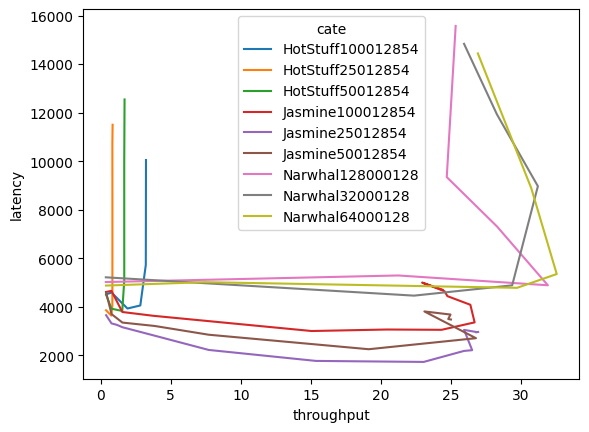

In [113]:
mypath = "./1-plans"
pic, data = process_dir(mypath)
pic

In [60]:
data

,cate,rate,latency,throughput,consensus-latency
0,HotStuff100012854,100,4515.054459,0.389443,1018.102706
0,HotStuff100012854,200,4587.830791,0.773716,1049.933967
0,HotStuff100012854,500,3930.654146,1.912339,1028.260631
0,HotStuff100012854,750,4056.332524,2.830348,990.407266
0,HotStuff100012854,875,5727.795883,3.222323,977.198729
...,...,...,...,...,...
0,Narwhal64000128,1000,5016.000000,7.406000,NaN
0,Narwhal64000128,2000,4783.000000,29.720000,NaN
0,Narwhal64000128,9000,5351.000000,32.550000,NaN
0,Narwhal64000128,10000,8885.000000,30.734000,NaN


<AxesSubplot:xlabel='throughput', ylabel='latency'>

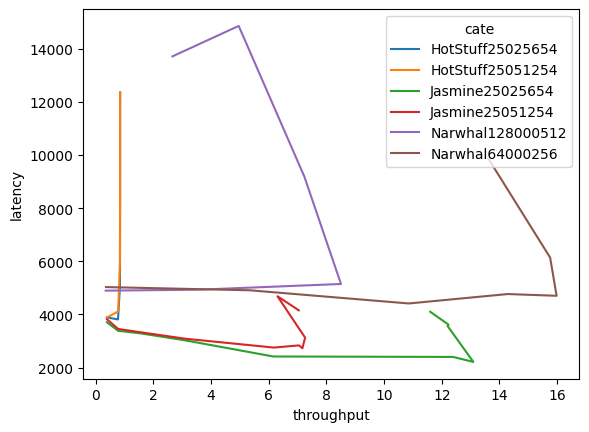

In [98]:
mypath = "./2-plans"
pic, data = process_dir(mypath)
pic

In [86]:
data

,cate,rate,latency,throughput,consensus-latency
0,HotStuff25025654,100,3889.965593,0.385358,1010.435212
0,HotStuff25025654,200,3814.471687,0.770639,966.244733
0,HotStuff25025654,225,5073.907308,0.838753,947.495991
0,HotStuff25025654,250,8504.723712,0.844191,947.447755
0,HotStuff25025654,300,11745.394700,0.845103,952.296747
0,HotStuff25025654,400,12353.801838,0.845811,959.788468
0,HotStuff25051254,100,3884.117877,0.386861,1008.767499
0,HotStuff25051254,200,4118.476876,0.777041,971.327479
0,HotStuff25051254,225,5976.088263,0.837931,954.085102
0,HotStuff25051254,250,9970.655382,0.845197,950.939505


<AxesSubplot:xlabel='throughput', ylabel='latency'>

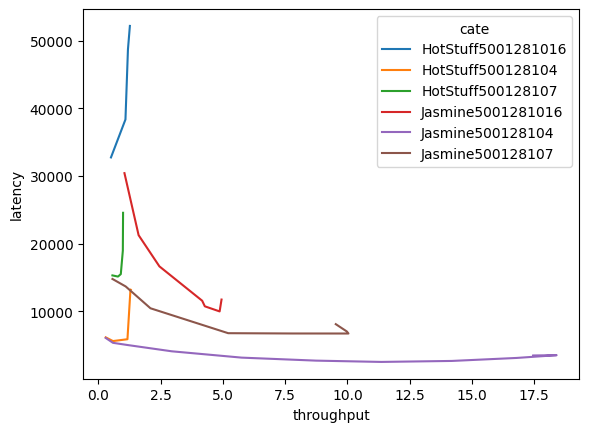

In [143]:
mypath = "./4-plans"
pic, data = process_dir(mypath)
pic

In [132]:
data

,cate,consensus-latency,rate,latency,throughput
0,HotStuff5001281016,1253.823905,100,38353.127713,1.087445
0,HotStuff5001281016,1260.066692,200,48718.691211,1.187549
0,HotStuff5001281016,1275.027569,1000,52180.019549,1.265012
0,HotStuff500128104,1094.901363,100,6154.094868,0.293728
0,HotStuff500128104,1086.544653,200,5601.691879,0.586114
0,HotStuff500128104,1184.718601,400,5873.002983,1.167217
0,HotStuff500128104,1253.735708,600,13093.359828,1.286781
0,HotStuff500128104,1251.700449,800,13187.461250,1.300537
0,HotStuff500128107,1116.012135,100,15306.898119,0.563409
0,HotStuff500128107,1193.186576,150,15133.488573,0.787661


<AxesSubplot:xlabel='throughput', ylabel='latency'>

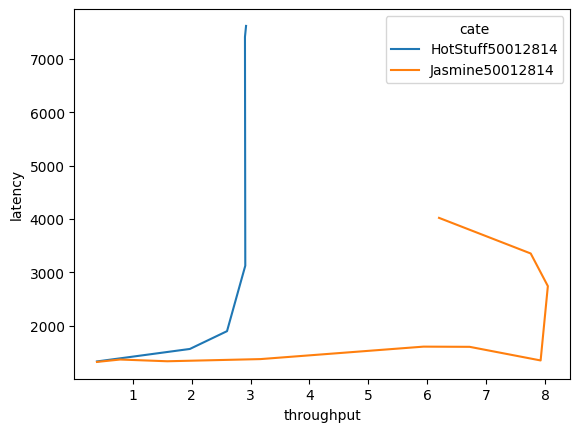

In [155]:
mypath = "./5-plans"
pic, data = process_dir(mypath)
pic

In [156]:
data

,cate,consensus-latency,rate,latency,throughput
0,HotStuff50012814,617.586067,100,1328.015725,0.393396
0,HotStuff50012814,592.363590,500,1562.280074,1.970517
0,HotStuff50012814,582.086356,675,1896.044009,2.601264
0,HotStuff50012814,573.206286,750,3123.605530,2.911290
0,HotStuff50012814,580.277918,1000,7414.591149,2.905861
0,HotStuff50012814,658.230293,2000,7620.464456,2.924241
0,Jasmine50012814,608.732173,100,1319.091923,0.393521
0,Jasmine50012814,630.454607,200,1364.039391,0.787292
0,Jasmine50012814,614.870803,400,1331.496306,1.586902
0,Jasmine50012814,614.087075,800,1372.144957,3.169681


<AxesSubplot:xlabel='throughput', ylabel='latency'>

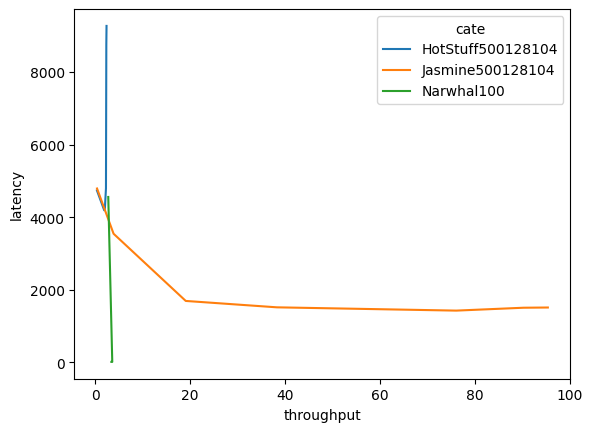

In [466]:
mypath = "./3-plan"
pic, data = process_dir(mypath)
pic